# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

## Reporter Area

In [3]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [4]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("lao")
partner_area_ids

[{'id': '418', 'text': "Lao People's Dem. Rep."}]

## Trade Regime

In [5]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Import")
trade_regime_ids

[{'id': '1', 'text': 'Import'}, {'id': '4', 'text': 're-Import'}]

## Data availability request

In [6]:
source = 699 # India
destination = 418 # Lao
tta.set_source_destination(source, destination)

source_status = tta.source_data_available()
print(source_status)
destination_status = tta.destination_data_available()
print(destination_status)

[{'type': 'COMMODITIES', 'freq': 'ANNUAL', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '2019', 'TotalRecords': 526744, 'isOriginal': 0, 'publicationDate': '2020-05-27T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'ANNUAL', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '2019', 'TotalRecords': 34472, 'isOriginal': 0, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


## Data request

In [7]:
data = tta.compare_import(2019, 'AG6') # AG2, AG4, AG6

{'r': 699, 'p': 418, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': 418, 'p': 699, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


## Data

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 5000)

In [9]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df['quantity_diff'].round(2)
df['value_diff'].round(2)
df['quantity_pct'] = (df['quantity_diff'] / df['quantity_a']) * 100
df['value_pct'] = (df['value_diff'] / df['value_a']) * 100
df['quantity_pct'].round(2)
df['value_pct'].round(2)
df['value_diff_abs'] = abs(df['value_diff'])
df['value_pct_abs'] = abs(df['value_pct'])
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
090111,090111,Coffee; not roasted or decaffeinated,0,Weight in kilograms,0,162000,Weight in kilograms,0.19,-0.19,-162000,-inf,-inf,0.19,inf
130190,130190,"Natural gums, resins, gum-resins and oleoresin...",0,Weight in kilograms,0,92150,Weight in kilograms,0.12,-0.12,-92150,-inf,-inf,0.12,inf
152190,152190,"Waxes, other than vegetable, n.e.c. in heading...",0,Weight in kilograms,0,2010,Weight in kilograms,0.01,-0.01,-2010,-inf,-inf,0.01,inf
330741,330741,Perfumes and deodorizers; perfuming or deodori...,0,Weight in kilograms,0,14719,Weight in kilograms,0.00,0.00,-14719,-inf,NaN,0.00,NaN
392310,392310,"Plastics; boxes, cases, crates and similar art...",0,Weight in kilograms,0,765,Weight in kilograms,0.00,0.00,-765,-inf,NaN,0.00,NaN
400122,400122,Rubber; technically specified natural rubber (...,0,Weight in kilograms,0,483840,Weight in kilograms,0.57,-0.57,-483840,-inf,-inf,0.57,inf
420212,420212,"Cases and containers; trunks, suit-cases, vani...",0,No Quantity,0,56,No Quantity,0.00,0.00,-56,-inf,NaN,0.00,NaN
420229,420229,Cases and containers; handbags (whether or not...,0,No Quantity,0,123,No Quantity,0.00,0.00,-123,-inf,NaN,0.00,NaN
440890,440890,"Wood; n.e.c. in heading no. 4408, sheets for v...",0,Weight in kilograms,0,855789,Weight in kilograms,0.12,-0.12,-855789,-inf,-inf,0.12,inf
440929,440929,"Wood; non-coniferous, other than bamboo or tro...",0,Weight in kilograms,0,168359,Weight in kilograms,0.03,-0.03,-168359,-inf,-inf,0.03,inf


In [10]:
df.to_csv('import_in_la_2019_6.csv')

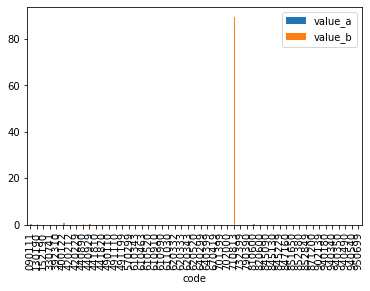

In [11]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

## Aggregate

In [12]:
# value_a is source country
# value_b is destination country
print("Total Import, as per Source data:", df['value_a'].sum(), " million USD.")
print("Total Export, as per Destination data:", df['value_b'].sum(), " million USD.")


Total Import, as per Source data: 0  million USD.
Total Export, as per Destination data: 90.57  million USD.


## Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [13]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 10 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
710813,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0,18076,Weight in kilograms,89.35,-89.35,-18076,-inf,-inf,89.35,inf


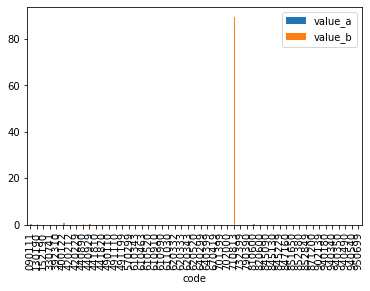

In [14]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()